In [1]:
#Import data packages
import numpy as np
import pandas as pd

#Import audio packages
import librosa
import librosa.display
from scipy.io import wavfile
import scipy.io.wavfile
import sys

#Import plotting packages
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
import matplotlib.pyplot as plt
import seaborn as sns

#Import Keras & Tensorflow packages
import keras
from keras import regularizers
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix

In [2]:
final_dataframe = pd.read_csv('data/final_data.csv',index_col=0)

In [3]:
final_dataframe

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,emotion
0,-587.907898,36.178154,-17.241106,-9.742208,-27.773447,-14.733717,-11.477688,-15.569857,-14.273412,-8.294398,...,3.212901,-1.833511,-2.232787,-4.604078,0.343586,-1.242408,-0.375359,3.929535,10.683189,sad
1,-509.770386,43.354965,-24.751860,8.810980,-8.211090,-24.347290,-9.572964,-15.536777,-10.063596,4.296363,...,1.836776,-8.388222,-7.970921,-3.082049,3.787357,-0.004449,2.402939,7.500911,7.930544,happy
2,-608.325256,91.134865,-8.422993,24.703096,1.783348,-23.475849,-8.582272,-3.728264,-11.954734,0.899885,...,5.030650,0.232143,2.143103,-1.058072,-1.230369,-0.428278,6.082251,10.974966,18.634037,calm
3,-504.740112,55.126217,-20.908773,13.133360,-6.350088,-7.488061,-18.778595,-4.136145,-18.639141,-2.384829,...,2.723440,2.149348,0.681944,-4.007479,-1.396597,-1.036337,5.015131,10.885223,16.854820,happy
4,-637.394531,43.984432,-17.269554,-3.644861,-15.109137,-18.893116,-2.212192,-20.164730,-10.050422,2.773326,...,15.225397,0.327097,-4.202260,-5.842893,1.823740,-2.011576,3.554226,11.488029,20.341881,calm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5247,-433.188965,57.363720,4.908972,13.024331,-3.378766,-0.960908,-15.769565,4.778440,-14.686361,-8.497721,...,6.618638,6.445676,-1.611167,-1.723101,1.382978,4.430180,5.747354,-2.161623,3.657368,angry
5248,-559.998840,101.993713,33.605961,12.951871,21.204279,13.413920,4.372688,-7.319698,-9.703876,1.709915,...,16.355019,8.957122,11.558165,4.750055,4.040524,2.418961,6.325723,7.394610,15.063540,sad
5249,-496.139191,133.011856,45.438461,0.555025,10.132165,11.738538,-6.431499,7.704493,-19.552839,-16.369890,...,0.150162,3.208148,6.247221,12.822376,13.872787,10.784860,12.104943,9.085450,10.249683,disgust
5250,-353.824036,98.714981,-1.281175,8.937387,-3.878722,-3.579316,-3.132740,-20.462267,-5.338827,8.199279,...,-2.974227,-11.691386,-2.699654,3.988725,22.577427,33.460434,37.656155,27.965282,13.931880,neutral


# Dividing the data into test and train

In [4]:
#Split features from targets
X = final_dataframe.iloc[:,:-1]

#Split targets
y = final_dataframe.iloc[:,-1]

In [5]:
#Get sample of target
y

0           sad
1         happy
2          calm
3         happy
4          calm
         ...   
5247      angry
5248        sad
5249    disgust
5250    neutral
5251       fear
Name: emotion, Length: 5252, dtype: object

In [6]:
#Get sample of features
X

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-587.907898,36.178154,-17.241106,-9.742208,-27.773447,-14.733717,-11.477688,-15.569857,-14.273412,-8.294398,...,-2.337345,3.212901,-1.833511,-2.232787,-4.604078,0.343586,-1.242408,-0.375359,3.929535,10.683189
1,-509.770386,43.354965,-24.751860,8.810980,-8.211090,-24.347290,-9.572964,-15.536777,-10.063596,4.296363,...,1.311170,1.836776,-8.388222,-7.970921,-3.082049,3.787357,-0.004449,2.402939,7.500911,7.930544
2,-608.325256,91.134865,-8.422993,24.703096,1.783348,-23.475849,-8.582272,-3.728264,-11.954734,0.899885,...,0.012662,5.030650,0.232143,2.143103,-1.058072,-1.230369,-0.428278,6.082251,10.974966,18.634037
3,-504.740112,55.126217,-20.908773,13.133360,-6.350088,-7.488061,-18.778595,-4.136145,-18.639141,-2.384829,...,0.796294,2.723440,2.149348,0.681944,-4.007479,-1.396597,-1.036337,5.015131,10.885223,16.854820
4,-637.394531,43.984432,-17.269554,-3.644861,-15.109137,-18.893116,-2.212192,-20.164730,-10.050422,2.773326,...,1.124650,15.225397,0.327097,-4.202260,-5.842893,1.823740,-2.011576,3.554226,11.488029,20.341881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5247,-433.188965,57.363720,4.908972,13.024331,-3.378766,-0.960908,-15.769565,4.778440,-14.686361,-8.497721,...,1.629190,6.618638,6.445676,-1.611167,-1.723101,1.382978,4.430180,5.747354,-2.161623,3.657368
5248,-559.998840,101.993713,33.605961,12.951871,21.204279,13.413920,4.372688,-7.319698,-9.703876,1.709915,...,5.289425,16.355019,8.957122,11.558165,4.750055,4.040524,2.418961,6.325723,7.394610,15.063540
5249,-496.139191,133.011856,45.438461,0.555025,10.132165,11.738538,-6.431499,7.704493,-19.552839,-16.369890,...,-1.042813,0.150162,3.208148,6.247221,12.822376,13.872787,10.784860,12.104943,9.085450,10.249683
5250,-353.824036,98.714981,-1.281175,8.937387,-3.878722,-3.579316,-3.132740,-20.462267,-5.338827,8.199279,...,-12.223659,-2.974227,-11.691386,-2.699654,3.988725,22.577427,33.460434,37.656155,27.965282,13.931880


In [7]:
from sklearn.model_selection import train_test_split

#Split train & test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Check out the data
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (4201, 40)
y_train shape: (4201,)
X_test shape: (1051, 40)
y_test shape: (1051,)


In [8]:
#Check unique values for y_test
y_test.unique()

array(['calm', 'fear', 'angry', 'neutral', 'disgust', 'sad', 'happy',
       'surprised'], dtype=object)

In [9]:
#Check unique values for y_train
y_train.unique()

array(['angry', 'happy', 'fear', 'calm', 'sad', 'surprised', 'neutral',
       'disgust'], dtype=object)

In [10]:
y_train.value_counts()

happy        635
sad          626
fear         611
angry        610
disgust      477
surprised    473
neutral      471
calm         298
Name: emotion, dtype: int64

In [11]:
y_test.value_counts()

angry        166
fear         165
sad          150
happy        141
surprised    119
neutral      117
disgust      115
calm          78
Name: emotion, dtype: int64

In [12]:
y_train

2781        angry
891         happy
273          fear
1300         calm
3936        happy
          ...    
905       disgust
5192    surprised
3980         fear
235           sad
5157      neutral
Name: emotion, Length: 4201, dtype: object

In [13]:
y_test

4            calm
3251         fear
440         angry
1413      neutral
4353      disgust
          ...    
2907        angry
759          calm
1042         fear
3570    surprised
3376          sad
Name: emotion, Length: 1051, dtype: object

In [14]:
labels = {'neutral':0, 'calm':1, 'happy':2, 'sad':3, 'angry':4, 'fear':5, 'disgust':6, 'surprised':7}

In [15]:
y_train_lb = y_train.map(labels)
y_test_lb = y_test.map(labels)

In [16]:
y_train_lb

2781    4
891     2
273     5
1300    1
3936    2
       ..
905     6
5192    7
3980    5
235     3
5157    0
Name: emotion, Length: 4201, dtype: int64

In [17]:
y_test_lb

4       1
3251    5
440     4
1413    0
4353    6
       ..
2907    4
759     1
1042    5
3570    7
3376    3
Name: emotion, Length: 1051, dtype: int64

In [18]:
#Label Encoding
from keras.utils import np_utils

#Encode emotion labels into numbers
y_train_lb = np_utils.to_categorical(y_train_lb)
y_test_lb = np_utils.to_categorical(y_test_lb)

# Check out the data
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train_lb.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test_lb.shape}')

X_train shape: (4201, 40)
y_train shape: (4201, 8)
X_test shape: (1051, 40)
y_test shape: (1051, 8)


In [19]:
#Check encoding
np.unique(y_train_lb, axis=0)

array([[0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [20]:
# range of x values
print(f'X range: {X_train.min()}-{X_train.max()}')
# y unique values
print(f'y values: {np.unique(y_train_lb)}')
num_classes = len(np.unique(y_train_lb))
print(f'Number of classes: {num_classes}')

X range: 0    -802.791199
1      -5.577060
2     -61.390438
3     -52.139618
4     -53.896233
5     -42.359554
6     -30.524818
7     -40.977211
8     -36.335476
9     -23.935202
10    -31.756395
11    -20.684074
12    -23.866884
13    -13.509240
14    -19.023081
15    -16.787739
16    -18.429003
17    -13.683393
18    -20.802546
19    -18.797440
20    -14.672148
21    -11.550047
22    -14.889110
23    -12.746976
24    -18.111746
25    -10.476698
26    -14.396708
27     -9.329136
28    -16.196690
29    -12.465147
30    -17.605717
31    -10.091280
32    -17.813940
33    -13.397492
34    -12.835851
35     -7.749759
36    -13.340294
37     -8.291898
38    -13.509073
39     -6.379797
dtype: float64-0    -207.591217
1     151.428589
2      55.034927
3      58.653442
4      30.714607
5      25.294191
6      18.340857
7      12.700063
8      16.267603
9      25.757534
10     13.195489
11     21.895908
12     16.361759
13     24.347334
14     18.420378
15     15.160636
16     14.390320
17     

## Build list of labels to build confusion matrix after model

In [21]:
#Check encoding labels
labels

{'neutral': 0,
 'calm': 1,
 'happy': 2,
 'sad': 3,
 'angry': 4,
 'fear': 5,
 'disgust': 6,
 'surprised': 7}

In [22]:
#Build new lists of encoding labels
y_labels_encoded = {}
for i, label in enumerate(labels):
    y_labels_encoded[i] = label
    
y_labels_encoded

{0: 'neutral',
 1: 'calm',
 2: 'happy',
 3: 'sad',
 4: 'angry',
 5: 'fear',
 6: 'disgust',
 7: 'surprised'}

# Scale data for analysis

In [23]:
from sklearn.preprocessing import StandardScaler
#Normalize the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scalled = scaler.transform(X_train)
X_test_scalled = scaler.transform(X_test)

In [24]:
import pickle
with open('meta/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Build Model - Random Forest

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
#fitting the DT
DT_model_one = DecisionTreeClassifier()
DT_model_one.fit(X_train, y_train_lb)

#Getting the score
print(f"The training classification accuracy is: {DT_model_one.score(X_train, y_train_lb)}")
print(f"The validation classification accuracy is: {DT_model_one.score(X_test, y_test_lb)}")

The training classification accuracy is: 1.0
The validation classification accuracy is: 0.6850618458610847


# Build model - Convolution Neural Network

### Change dimensions for CNN model

In [27]:
#Add dimension for CNN
x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)

#Check shapes of dataframes
print(x_traincnn.shape)
print(x_testcnn.shape)

(4201, 40, 1)
(1051, 40, 1)


In [28]:
#Import packages for CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Conv1D 
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, BatchNormalization, Flatten, MaxPooling1D

In [29]:
#Build sequential CNN
CNN_model = Sequential()

In [30]:
#Build first layer
CNN_model.add(Conv1D(16, 5,padding='same', input_shape=(40, 1), activation='relu'))

In [31]:
#Build second layer
CNN_model.add(Conv1D(32, 5,padding='same',activation='relu'))
CNN_model.add(MaxPooling1D(pool_size=(4)))

In [32]:
#Build third layer
CNN_model.add(Conv1D(64, 5,padding='same',activation='relu'))

In [33]:
#Build forth layer
CNN_model.add(Conv1D(128, 5,padding='same',activation='relu'))

In [34]:
#Add dropout
CNN_model.add(Dropout(0.1))

#Flatten 
CNN_model.add(Flatten())

In [35]:
CNN_model.add(Dense(128, activation ='relu'))
CNN_model.add(Dropout(0.1))
CNN_model.add(Dense(64, activation ='relu'))
CNN_model.add(Dense(8, activation='softmax'))

In [36]:
#Look at CNN model summary
CNN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 40, 16)            96        
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 40, 32)            2592      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 10, 32)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 10, 64)            10304     
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 10, 128)           41088     
_________________________________________________________________
dropout (Dropout)            (None, 10, 128)           0         
_________________________________________________________________
flatten (Flatten)            (None, 1280)              0

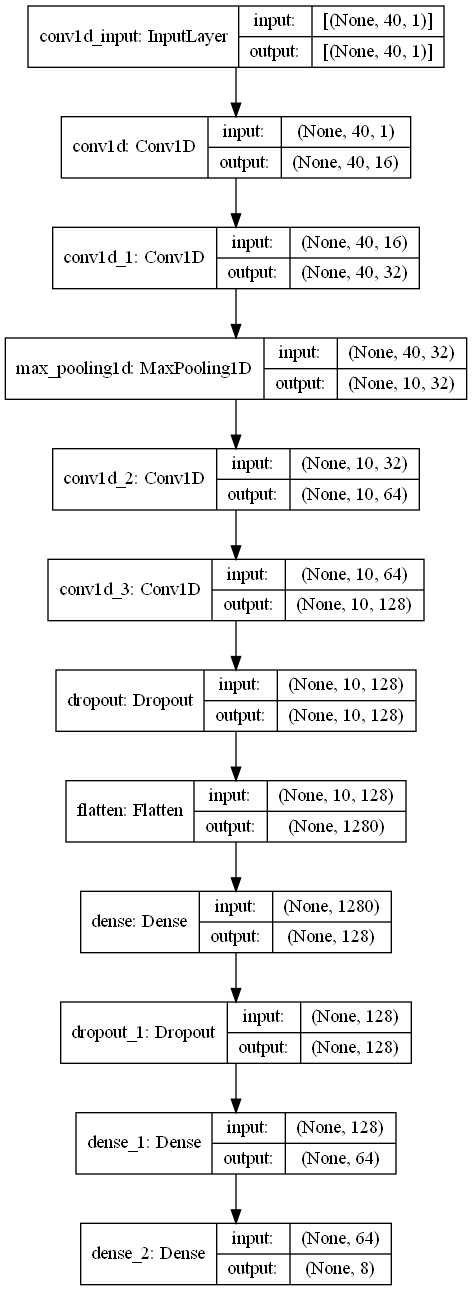

In [37]:
from tensorflow.keras.utils import plot_model

# Save an image of the model's architecture to a file
plot_model(CNN_model, to_file='Feed Forward NN.png', show_shapes=True, show_layer_names=True)

In [38]:
from tensorflow.keras.optimizers import RMSprop

In [39]:
# Compile the model with the desired loss function, optimizer, and metric to optimize
CNN_model.compile(loss = 'categorical_crossentropy',
                  optimizer = RMSprop(learning_rate=0.00005, rho=0.9, epsilon=1e-07, decay=0.0),
                  metrics = ['accuracy'])

In [40]:
from keras.callbacks import ModelCheckpoint 

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.basic_cnn.hdf5', 
                               verbose=1, save_best_only=True)

#Model fit
cnn_results = CNN_model.fit(x_traincnn, y_train_lb,
              batch_size = 64,
              epochs = 200,
              verbose = 1,
              validation_data = (x_testcnn, y_test_lb))

Epoch 1/200
66/66 [==============================] - 7s 15ms/step - loss: 2.6754 - accuracy: 0.1728 - val_loss: 1.9176 - val_accuracy: 0.2379
Epoch 2/200
66/66 [==============================] - 1s 8ms/step - loss: 1.9500 - accuracy: 0.2714 - val_loss: 1.7190 - val_accuracy: 0.3692
Epoch 3/200
66/66 [==============================] - 1s 8ms/step - loss: 1.7426 - accuracy: 0.3663 - val_loss: 1.5131 - val_accuracy: 0.4900
Epoch 4/200
66/66 [==============================] - 0s 8ms/step - loss: 1.5683 - accuracy: 0.4382 - val_loss: 1.3532 - val_accuracy: 0.5271
Epoch 5/200
66/66 [==============================] - 0s 8ms/step - loss: 1.4254 - accuracy: 0.4868 - val_loss: 1.2471 - val_accuracy: 0.5490
Epoch 6/200
66/66 [==============================] - 1s 8ms/step - loss: 1.3092 - accuracy: 0.5182 - val_loss: 1.1735 - val_accuracy: 0.5661
Epoch 7/200
66/66 [==============================] - 0s 7ms/step - loss: 1.2348 - accuracy: 0.5482 - val_loss: 1.1183 - val_accuracy: 0.5861
Epoch 8/200


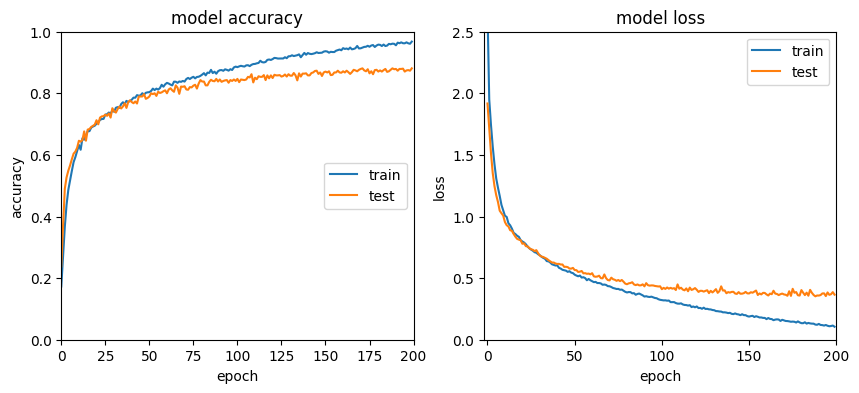

In [41]:
#Plot model accuracy over ephocs
fig, ax = plt.subplots(1,2,figsize=(10,4))

ax[0].plot(cnn_results.history['accuracy'])
ax[0].plot(cnn_results.history['val_accuracy'])
ax[0].set_title('model accuracy')
ax[0].set_ylabel('accuracy')
ax[0].set_xlabel('epoch')
ax[0].set_xlim(0,200)
ax[0].set_ylim(0,1)
ax[0].legend(['train', 'test'], loc='center right')

ax[1].plot(cnn_results.history['loss'])
ax[1].plot(cnn_results.history['val_loss'])
ax[1].set_title('model loss')
ax[1].set_ylabel('loss')
ax[1].set_xlabel('epoch')
ax[1].set_xlim(-2,200)
ax[1].set_ylim(0,2.5)
ax[1].legend(['train', 'test'], loc='upper right')
plt.savefig('images/model_cnn_acc.png',dpi=200)
plt.show()

In [42]:
# Calculate pre-training accuracy 
score = CNN_model.evaluate(x_testcnn, y_test_lb, verbose=1)
accuracy = 100*score[1]

print("Pre-training accuracy: %.4f%%" % accuracy)

33/33 [==============================] - 0s 3ms/step - loss: 0.3656 - accuracy: 0.8811
Pre-training accuracy: 88.1066%


In [43]:
# Evaluating the model on the training and testing set
score = CNN_model.evaluate(x_traincnn, y_train_lb, verbose=0)
print("Training Accuracy: ", round(score[1]*100,2))

score = CNN_model.evaluate(x_testcnn, y_test_lb, verbose=0)
print("Testing Accuracy: ", round(score[1]*100,2))

Training Accuracy:  99.17
Testing Accuracy:  88.11


# Add Confusion Matrix

In [44]:
#Get predictions from model
y_test_predictions = np.argmax(CNN_model.predict(x_testcnn), axis=-1)
y_test_predictions

array([1, 5, 4, ..., 5, 7, 3], dtype=int64)

In [45]:
y_test_predictions

array([1, 5, 4, ..., 5, 7, 3], dtype=int64)

In [46]:
y_test

4            calm
3251         fear
440         angry
1413      neutral
4353      disgust
          ...    
2907        angry
759          calm
1042         fear
3570    surprised
3376          sad
Name: emotion, Length: 1051, dtype: object

In [47]:
#Get labels for emotions
y_labels_encoded

{0: 'neutral',
 1: 'calm',
 2: 'happy',
 3: 'sad',
 4: 'angry',
 5: 'fear',
 6: 'disgust',
 7: 'surprised'}

In [48]:
# Change predictions to emotions in order to compare
y_test_predictions_labels =[]

#Go through each prediction and append to new list
for e in range(len(y_test_predictions)):
    y_test_predictions_labels.append(y_labels_encoded[y_test_predictions[e]])
    
#Build array of predictions
y_test_predictions_labels = np.array(y_test_predictions_labels,dtype='object')
y_test_predictions_labels

array(['calm', 'fear', 'angry', ..., 'fear', 'surprised', 'sad'],
      dtype=object)

In [49]:
from sklearn.metrics import confusion_matrix

#Build confusion matrix and see results
confusion_matrix = confusion_matrix(y_test, y_test_predictions_labels)
confusion_matrix

array([[152,   1,   1,   5,   3,   1,   1,   2],
       [  0,  71,   3,   0,   0,   2,   2,   0],
       [  1,   0, 103,   0,   4,   0,   3,   4],
       [  3,   3,   0, 143,   6,   1,   9,   0],
       [  2,   2,   0,   8, 124,   1,   1,   3],
       [  0,   8,   1,   1,   0, 106,   1,   0],
       [  1,   4,   1,   9,   2,   3, 129,   1],
       [  0,   0,   5,   3,   7,   1,   5,  98]], dtype=int64)

In [50]:
#See confusion matrix shape
confusion_matrix.shape

(8, 8)

In [51]:
#Turn all correct answers into 0 to visualize errors better
for i in range(confusion_matrix.shape[0]):
    for j in range(confusion_matrix.shape[1]):
        if i == j:
            confusion_matrix[i,j] = 0

# See results
confusion_matrix

array([[0, 1, 1, 5, 3, 1, 1, 2],
       [0, 0, 3, 0, 0, 2, 2, 0],
       [1, 0, 0, 0, 4, 0, 3, 4],
       [3, 3, 0, 0, 6, 1, 9, 0],
       [2, 2, 0, 8, 0, 1, 1, 3],
       [0, 8, 1, 1, 0, 0, 1, 0],
       [1, 4, 1, 9, 2, 3, 0, 1],
       [0, 0, 5, 3, 7, 1, 5, 0]], dtype=int64)

In [52]:
#Add labels to confusion matrix
confusion_matrix = pd.DataFrame(confusion_matrix, columns=list(y_labels_encoded.values()), index=list(y_labels_encoded.values()))

print("The rows represents the true values or observations")
print("The columns respresent the model's predictions")

#Print confusion matrix results
confusion_matrix

The rows represents the true values or observations
The columns respresent the model's predictions


,neutral,calm,happy,sad,angry,fear,disgust,surprised
neutral,0,1,1,5,3,1,1,2
calm,0,0,3,0,0,2,2,0
happy,1,0,0,0,4,0,3,4
sad,3,3,0,0,6,1,9,0
angry,2,2,0,8,0,1,1,3
fear,0,8,1,1,0,0,1,0
disgust,1,4,1,9,2,3,0,1
surprised,0,0,5,3,7,1,5,0


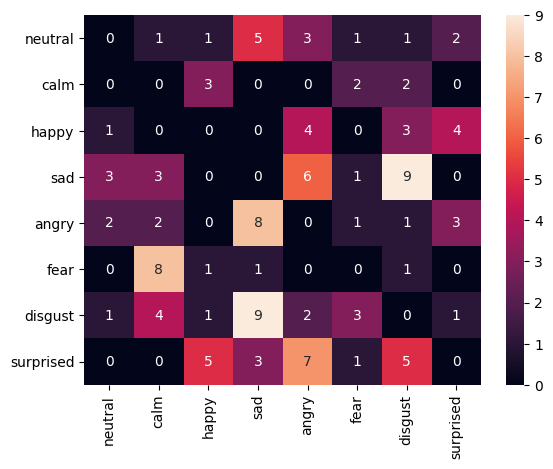

In [53]:
#Plot confusion matrix with results
ax = sns.heatmap(confusion_matrix, annot=True)
plt.savefig('confusion_matrix.png',dpi=200)

# Save CNN Model

In [130]:
from keras.models import model_from_json
# serialize model to json
json_model = CNN_model.to_json()
#save the model architecture to JSON file
with open('models/final_model.json', 'w') as json_file:
    json_file.write(json_model)
#saving the weights of the model
CNN_model.save_weights('models/final_model.h5')
#Model loss and accuracy
print("Saved model to disk")

Saved model to disk


# Thats all for training

In [131]:
checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.basic_cnn.hdf5', 
                               verbose=1, save_best_only=True)

#Model fit
cnn_results = CNN_model.fit(x_testcnn, y_test_lb,
              batch_size = 64,
              epochs = 200,
              verbose = 1
                )

Epoch 1/200
17/17 [==============================] - 0s 16ms/step - loss: 0.4294 - accuracy: 0.8630
Epoch 2/200
17/17 [==============================] - 0s 6ms/step - loss: 0.3502 - accuracy: 0.8725
Epoch 3/200
17/17 [==============================] - 0s 7ms/step - loss: 0.3367 - accuracy: 0.8887
Epoch 4/200
17/17 [==============================] - 0s 7ms/step - loss: 0.3353 - accuracy: 0.8773
Epoch 5/200
17/17 [==============================] - 0s 7ms/step - loss: 0.3030 - accuracy: 0.8925
Epoch 6/200
17/17 [==============================] - 0s 6ms/step - loss: 0.2941 - accuracy: 0.8887
Epoch 7/200
17/17 [==============================] - 0s 6ms/step - loss: 0.2816 - accuracy: 0.9001
Epoch 8/200
17/17 [==============================] - 0s 6ms/step - loss: 0.2688 - accuracy: 0.8896
Epoch 9/200
17/17 [==============================] - 0s 7ms/step - loss: 0.2645 - accuracy: 0.9144
Epoch 10/200
17/17 [==============================] - 0s 7ms/step - loss: 0.2528 - accuracy: 0.9058
Epoch 11

In [132]:
from keras.models import model_from_json
# serialize model to json
json_model = CNN_model.to_json()
#save the model architecture to JSON file
with open('models/full_final_model.json', 'w') as json_file:
    json_file.write(json_model)
#saving the weights of the model
CNN_model.save_weights('models/full_final_model.h5')
#Model loss and accuracy
print("Saved model to disk")

Saved model to disk
